In [2]:
import os
import PIL.Image as Image
import torch.cuda
import torchvision.transforms as transforms
import numpy as np
import torchvision
import LookGenerator.datasets.transforms as custom_transforms
from LookGenerator.datasets.utils import prepare_images_for_encoder, to_array_from_decoder, load_image, convert_channel, show_array_as_image, save_array_as_image
from LookGenerator.networks.encoder_decoder import EncoderDecoder
from LookGenerator.networks.utils import load_model
import cv2
from tqdm import tqdm


# Загрузка изображений

In [82]:
#root = r"C:\Users\Даша\кто\мусор\zalando-hd-resized\val"
root = r"C:\Users\DenisovDmitrii\Desktop\forEncoder\val"
file_name = r"00013_00"

human_image = load_image(root, r"imageWithNoCloth", file_name, ".png")
clothes = load_image(root, r"cloth", file_name, r".jpg")

pose_points = []
points_list = os.listdir(os.path.join(
    root,
    r"posePoints",
    file_name
))
print(len(points_list))
for pose_point in points_list:
    pose_point_image = convert_channel(load_image(root, os.path.join(r"posePoints", file_name), pose_point, ""))
    pose_points.append(pose_point_image)

# if model dataset has pose_points=False param:
pose_points = []

17


# Определение трансформаций

In [83]:
input_rgb_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.Normalize()
])

input_bin_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.Normalize()
])

# Загрузка весов модели

In [84]:
model_input = prepare_images_for_encoder(human_image, pose_points, clothes, input_rgb_transform, input_bin_transform).float()

In [85]:
#weights_dir = r"C:\Users\Даша\PycharmProjects\SMBackEnd\LookGenerator\weights\epoch_19.pt"
weights_dir = r"C:\Users\DenisovDmitrii\OneDrive - ITMO UNIVERSITY\peopleDetector\encoder\weights\session18\epoch_09.pt"

In [86]:
model = EncoderDecoder(in_channels=6, out_channels=3)
model = load_model(model, weights_dir)

In [87]:
device = 'cpu' if torch.cuda.is_available() else 'cpu'

model = model.to(device)
model_input = model_input.to(device)

# Прогон модели

In [88]:
save_path = fr"C:\Users\DenisovDmitrii\Desktop\forEncoder\out\{file_name}.png"
save_path_old = fr"C:\Users\DenisovDmitrii\Desktop\forEncoder\out\{file_name}_old.png"

In [89]:
model_output = model(model_input)

In [90]:
torchvision.utils.save_image(model_output, save_path)

# Отображение результата

In [91]:
model_output = to_array_from_decoder(model_output)

In [92]:
to_plt = np.array(model_output)

In [93]:
c = np.array(to_plt[:,:,0])
to_plt[:,:,0] = to_plt[:,:,2]
to_plt[:,:,2] = c

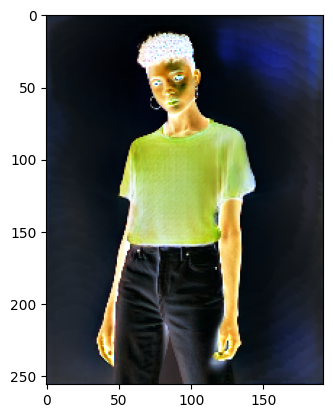

In [94]:
show_array_as_image(np.invert(np.uint8(255*to_plt)))
#save_array_as_image(np.uint8(255*model_output), save_path=save_path_old)
# cv2.imwrite(fr"C:\Users\DenisovDmitrii\Desktop\forEncoder\out\{file_name}.png", cv2.cvtColor(np.uint8(255*model_output), cv2.COLOR_RGB2BGR) )

In [3]:
dir_ = r"C:\Users\DenisovDmitrii\Desktop\forEncoder\val\imageWithNoCloth"
list_files = os.listdir(dir_)

In [4]:
input_rgb_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.Normalize()
])

input_bin_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.Normalize()
])

In [5]:
weights_dir = r"C:\Users\DenisovDmitrii\OneDrive - ITMO UNIVERSITY\peopleDetector\encoder\weights\session18\epoch_09.pt"
model = EncoderDecoder(in_channels=6, out_channels=3)
model = load_model(model, weights_dir)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)


In [7]:
for file_name_ in tqdm(list_files[:30]):
    root = r"C:\Users\DenisovDmitrii\Desktop\forEncoder\val"
    file_name = file_name_[:-4]

    human_image = load_image(root, r"imageWithNoCloth", file_name, ".png")
    clothes = load_image(root, r"cloth", file_name, r".jpg")

    pose_points = []
    points_list = os.listdir(os.path.join(
        root,
        r"posePoints",
        file_name
    ))
    for pose_point in points_list:
        pose_point_image = convert_channel(load_image(root, os.path.join(r"posePoints", file_name), pose_point, ""))
        pose_points.append(pose_point_image)

    # if model dataset has pose_points=False param:
    pose_points = []
    model_input = prepare_images_for_encoder(human_image, pose_points, clothes, input_rgb_transform, input_bin_transform).float()
    model_input = model_input.to(device)

    save_path = fr"C:\Users\DenisovDmitrii\Desktop\forEncoder\out\{file_name}.png"
    model_output = model(model_input)
    torchvision.utils.save_image(model_output.to('cpu'), save_path)
